<a href="https://colab.research.google.com/github/Preetham2310/About-US/blob/main/Copy_of_Travel_aggregator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the data
bookings = pd.read_csv("Bookings.csv")
sessions = pd.read_csv("Sessions.csv")

In [ ]:
# 1. Distinct bookings, sessions, and searches
num_distinct_bookings = bookings["booking_id"].nunique()
num_distinct_sessions = sessions["session_id"].nunique()
num_distinct_searches = sessions["search_id"].nunique()
print("Distinct bookings:", num_distinct_bookings)
print("Distinct sessions:", num_distinct_sessions)
print("Distinct searches:", num_distinct_searches)

Distinct bookings: 339
Distinct sessions: 331
Distinct searches: 1360


In [ ]:
# 2. Sessions with more than one booking
sessions_with_bookings = sessions.groupby("session_id")["booking_id"].nunique()
sessions_more_than_one_booking = sessions_with_bookings[sessions_with_bookings > 1].count()
print("Sessions with more than one booking:", sessions_more_than_one_booking)

Sessions with more than one booking: 10


In [ ]:
# 3. Bookings by day of the week
bookings['booking_time'] = pd.to_datetime(bookings['booking_time'])
bookings['day_of_week'] = bookings['booking_time'].dt.day_name()
bookings_by_day = bookings['day_of_week'].value_counts()
print(bookings_by_day)

day_of_week
Thursday     65
Tuesday      59
Monday       51
Friday       51
Saturday     44
Sunday       35
Wednesday    34
Name: count, dtype: int64


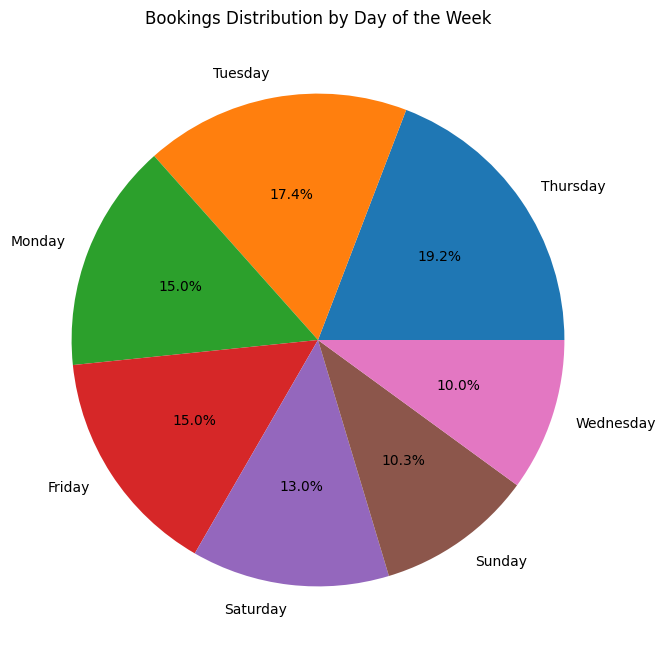

In [ ]:
# Pie chart for bookings by day of the week
bookings_by_day.plot.pie(autopct='%1.1f%%', figsize=(8, 8))
plt.title("Bookings Distribution by Day of the Week")
plt.ylabel("")
plt.show()

In [ ]:
# 4. Total bookings and Gross Booking Value per service
service_stats = bookings.groupby("service_name").agg({
    "booking_id": "count",
    "INR_Amount": "sum"
}).rename(columns={"booking_id": "Total Bookings", "INR_Amount": "Total Gross Booking Value"})
print(service_stats)

              Total Bookings  Total Gross Booking Value
service_name                                           
GOIBIBO                  186                 5897637.97
MMT                       48                  665669.08
YATRA                    105                 3378702.13


In [ ]:
# 5. Most booked route for customers with >1 booking
customers_with_multiple_bookings = bookings.groupby("customer_id")["booking_id"].count()
multi_booking_customers = customers_with_multiple_bookings[customers_with_multiple_bookings > 1].index
most_booked_route = bookings[bookings["customer_id"].isin(multi_booking_customers)].groupby(
    ["from_city", "to_city"]).size().idxmax()
print("Most booked route for customers with >1 booking:", most_booked_route)

Most booked route for customers with >1 booking: ('Gurgaon', 'Roissy-en-France')


In [ ]:
# 6. Top 3 departure cities with at least 5 bookings, mostly in advance
advance_booking_cities = bookings[bookings["days_to_departure"] > 0].groupby("from_city").agg({
    "days_to_departure": "mean",
    "booking_id": "count"
}).rename(columns={"days_to_departure": "Avg Days to Departure", "booking_id": "Total Bookings"})
top_3_cities = advance_booking_cities[advance_booking_cities["Total Bookings"] >= 5].sort_values(
    by="Avg Days to Departure", ascending=False).head(3)
print(top_3_cities)

            Avg Days to Departure  Total Bookings
from_city                                        
Bālāpur                 46.166667               6
Devanhalli              29.583333              24
Gurgaon                 27.175573             131


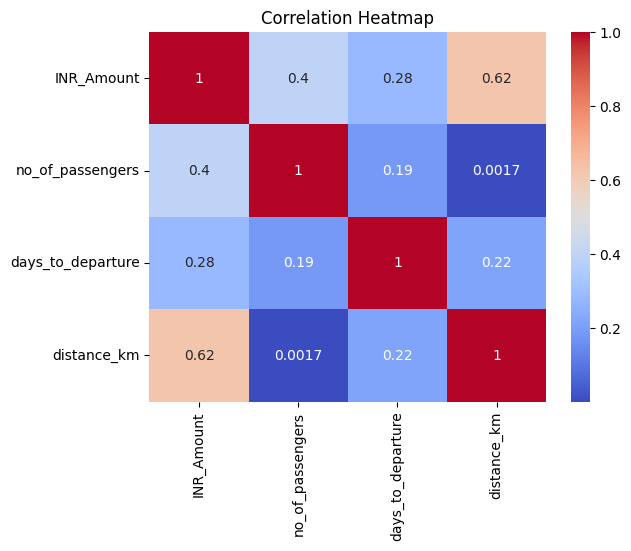

Most correlated pair: ('INR_Amount', 'distance_km')


In [ ]:
# 7. Heatmap for numerical column correlations
correlation = bookings.select_dtypes(include=["number"]).corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
most_correlated_pair = correlation.unstack().sort_values(ascending=False).drop_duplicates().index[1]
print("Most correlated pair:", most_correlated_pair)

In [ ]:
# 8. Most used device type for bookings by service
device_usage = bookings.groupby(["service_name", "device_type_used"]).size().reset_index(name="count")
most_used_devices = device_usage.loc[device_usage.groupby("service_name")["count"].idxmax()]
print(most_used_devices)

  service_name device_type_used  count
2      GOIBIBO              IOS     70
5          MMT          Desktop     30
9        YATRA          Desktop     51


<ipython-input-14-ba31255aa0e9>:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  bookings['quarter'] = bookings['booking_time'].dt.to_period("Q")


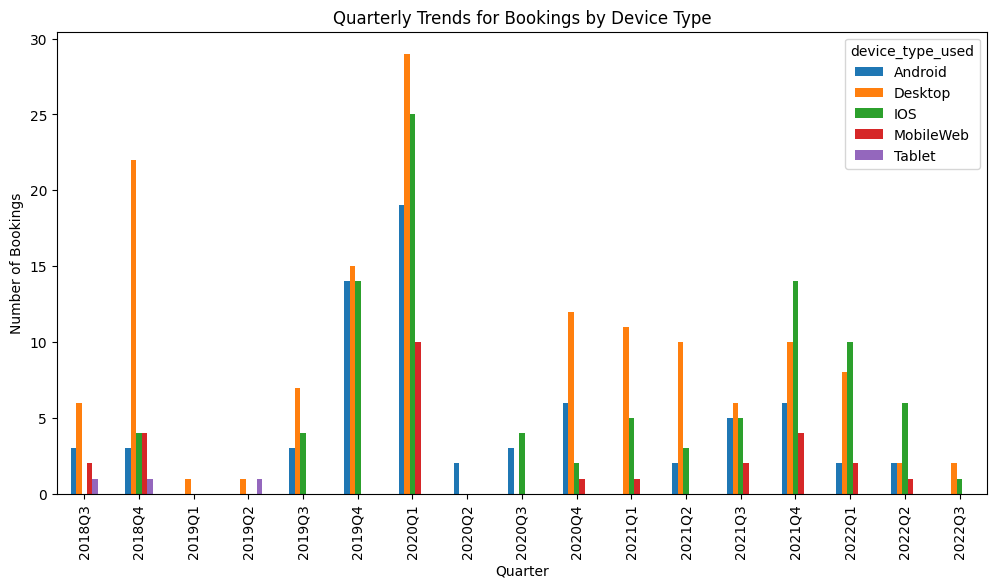

In [ ]:
# 9. Quarterly trends for device types
bookings['quarter'] = bookings['booking_time'].dt.to_period("Q")
quarterly_device_trends = bookings.groupby(["quarter", "device_type_used"])["booking_id"].count().unstack()
quarterly_device_trends.plot(kind="bar", figsize=(12, 6))
plt.title("Quarterly Trends for Bookings by Device Type")
plt.xlabel("Quarter")
plt.ylabel("Number of Bookings")
plt.show()

In [ ]:
# 10. Average oBSR calculations
# 10. Average oBSR calculations
sessions['month'] = pd.to_datetime(sessions['search_time'], infer_datetime_format=True, errors='coerce').dt.month
sessions['day_of_week'] = pd.to_datetime(sessions['search_time'], infer_datetime_format=True, errors='coerce').dt.day_name()
monthly_obsr = sessions.groupby("month").apply(
    lambda x: x["booking_id"].nunique() / x["search_id"].nunique()).mean()
print("Average oBSR per month:", monthly_obsr)

Average oBSR per month: 0.3284979076964611


<ipython-input-18-f2d8fa86e2c0>:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sessions['month'] = pd.to_datetime(sessions['search_time'], infer_datetime_format=True, errors='coerce').dt.month
<ipython-input-18-f2d8fa86e2c0>:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sessions['day_of_week'] = pd.to_datetime(sessions['search_time'], infer_datetime_format=True, errors='coerce').dt.day_name()
<ipython-input-18-f2d8fa86e2c0>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future vers

In [ ]:
daily_obsr = sessions.groupby("day_of_week").apply(
    lambda x: x["booking_id"].nunique() / x["search_id"].nunique()).mean()
print("Average oBSR per day of the week:", daily_obsr)

Average oBSR per day of the week: 0.23027990976776927


<ipython-input-19-10d6b397cce9>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  daily_obsr = sessions.groupby("day_of_week").apply(


<ipython-input-21-dd03c9c3d6d0>:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sessions['date'] = pd.to_datetime(sessions['search_time'],infer_datetime_format=True, errors='coerce').dt.date
<ipython-input-21-dd03c9c3d6d0>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  daily_obsr_timeseries = sessions.groupby("date").apply(


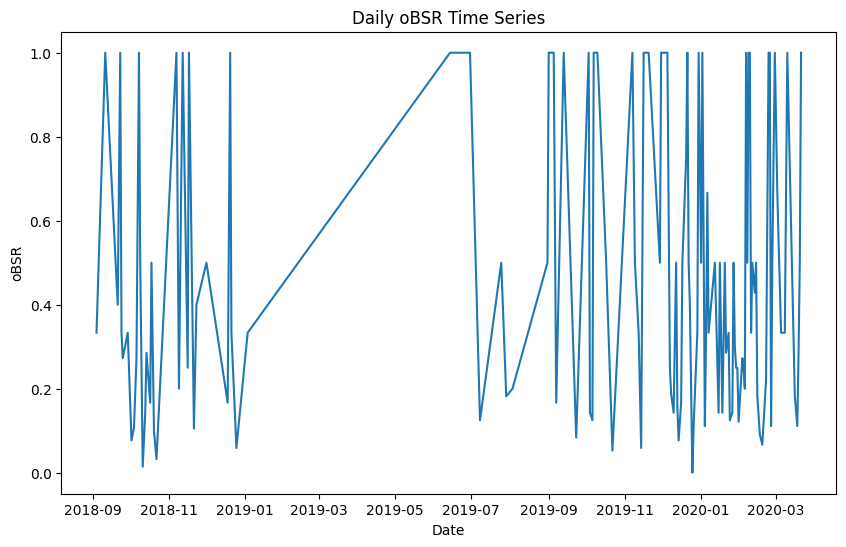

In [ ]:
# oBSR time series
sessions['date'] = pd.to_datetime(sessions['search_time'],infer_datetime_format=True, errors='coerce').dt.date
daily_obsr_timeseries = sessions.groupby("date").apply(
    lambda x: x["booking_id"].nunique() / x["search_id"].nunique())
daily_obsr_timeseries.plot(figsize=(10, 6))
plt.title("Daily oBSR Time Series")
plt.xlabel("Date")
plt.ylabel("oBSR")
plt.show()